In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar datos
data = pd.read_csv('recursos_humanos.csv')

In [50]:
data.head(30)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [51]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [52]:
# recodificar la variable salary y sales
data = pd.get_dummies(data, columns=['salary', 'sales'])
dummy_columns = [col for col in data.columns if 'salary_' in col or 'sales_' in col]
data[dummy_columns] = data[dummy_columns].astype(int)
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


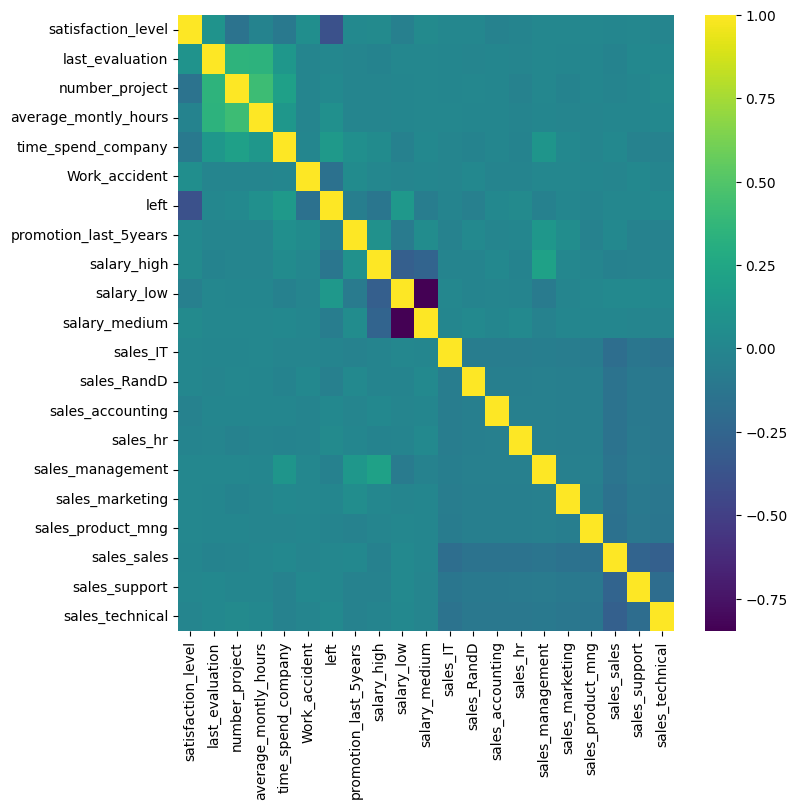

In [53]:
# Correlacion de la base de datos

correlacion = data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlacion, cmap='viridis')
plt.show()

In [54]:
# Normalizacion de las categorias
# para tener valores entre 0 y 1
# se usa la formula (x - min(x)) / (max(x) - min(x))

data['average_montly_hours'] = (data['average_montly_hours'] - data['average_montly_hours'].min()) / (data['average_montly_hours'].max() - data['average_montly_hours'].min())
data['time_spend_company'] = (data['time_spend_company'] - data['time_spend_company'].min()) / (data['time_spend_company'].max() - data['time_spend_company'].min())
data['number_project'] = (data['number_project'] - data['number_project'].min()) / (data['number_project'].max() - data['number_project'].min())
data['satisfaction_level'] = (data['satisfaction_level'] - data['satisfaction_level'].min()) / (data['satisfaction_level'].max() - data['satisfaction_level'].min())
data['last_evaluation'] = (data['last_evaluation'] - data['last_evaluation'].min()) / (data['last_evaluation'].max() - data['last_evaluation'].min())
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.318681,0.265625,0.0,0.285047,0.125,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.780220,0.781250,0.6,0.775701,0.500,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.021978,0.812500,1.0,0.822430,0.250,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.692308,0.796875,0.6,0.593458,0.375,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.307692,0.250000,0.0,0.294393,0.125,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14995,0.307692,0.187500,0.0,0.299065,0.125,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14996,0.307692,0.265625,0.0,0.219626,0.125,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14997,0.021978,0.937500,0.8,0.859813,0.250,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


<Axes: >

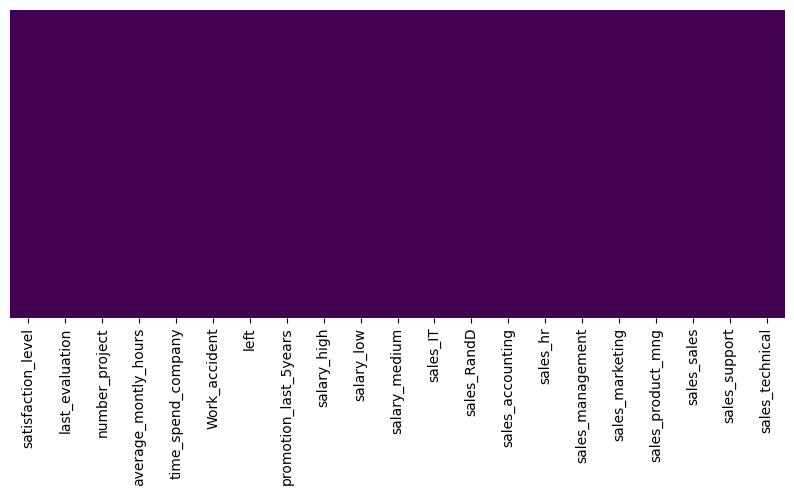

In [55]:
plt.figure(figsize=(10, 4))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [56]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,...,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.574542,0.556409,0.360611,0.490889,0.187279,0.144610,0.238083,0.021268,0.082472,0.487766,...,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,0.273220,0.267452,0.246518,0.233379,0.182517,0.351719,0.425924,0.144281,0.275092,0.499867,...,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.384615,0.312500,0.200000,0.280374,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.604396,0.562500,0.400000,0.485981,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.802198,0.796875,0.600000,0.696262,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Comprobacion de que la base de datos este balanceada

data['left'].value_counts()

# Separar la variable objetivo

X = data.drop('left', axis=1)
y = data['left']

# Dividir la base de datos en entrenamiento y prueba

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)


In [58]:
from sklearn.neighbors import KNeighborsClassifier
Knn= KNeighborsClassifier(n_neighbors=3)
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)
print('Precisión KNN: ', Knn.score(x_test, y_test))

Precisión KNN:  0.948


### Elaborando mapa de calor con matriz de confusión

In [59]:
Matriz_y = y_pred
Matriz_V = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Matriz_y, Matriz_V)
cm

array([[3300,   90],
       [ 144,  966]])

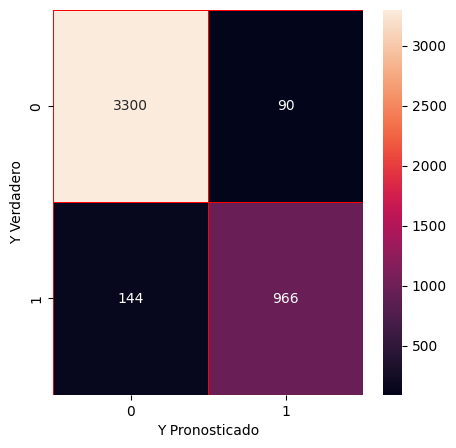

In [60]:
f, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cm, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel('Y Pronosticado')
plt.ylabel('Y Verdadero')
plt.show()

In [61]:
# calculo de la precision del modelo

correctos = cm[0,0] + cm[1,1]
Incorrectos = cm[0,1] + cm[1,0]

precision = correctos / (correctos + Incorrectos)
print('Precision del modelo: ', precision)

Precision del modelo:  0.948


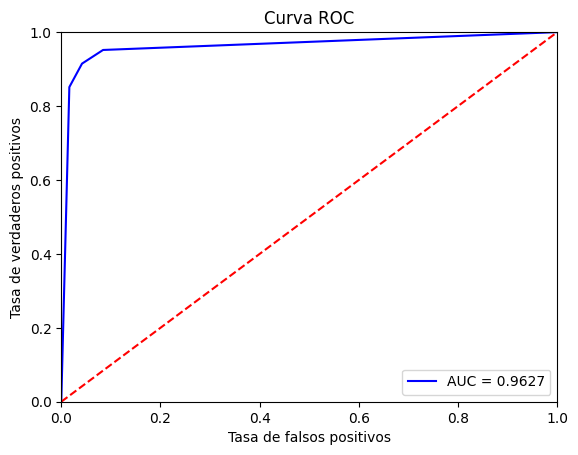

In [62]:
# Curva ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_proba = Knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.title('Curva ROC')
plt.show()